In [1]:
import pandas as pd
df = pd.read_stata('response_analysis.dta')

In [2]:
df # drop based on quit_31
# drop missing value more than 5%.


,id,wave,id_com,id_sm,id_sur,id_sur_alt,id_note,first_month,last_month,store_diff,...,n_act_starts,n_act_ends,n_diff_act_starts,n_diff_act_ends,get_fed_loan_reg,get_pvt_loan_reg,W2childintercoun,W2childinte,intervention,prepost
0,2838,2,1417,NaN,4203,6096.0,same case as id_sur == 6096,2015-02-01,2017-01-01,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1
1,3424,1,1710,NaN,3093,NaN,,2015-02-01,2017-01-01,0,...,8.0,8.0,1.0,3.0,0.0,0.0,NaN,NaN,0,0
2,4088,1,2042,NaN,2862,NaN,,2015-02-01,2017-01-01,0,...,12.0,11.0,3.0,2.0,0.0,0.0,NaN,NaN,0,0
3,4088,2,2042,NaN,2862,NaN,,2015-02-01,2017-01-01,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1
4,4416,2,2206,NaN,2118,NaN,,2015-02-01,2017-01-01,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
905,5511296,2,2755646,NaN,5804,NaN,,2016-05-01,2017-01-01,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1
906,5511298,2,2755647,NaN,5441,NaN,,2016-05-01,2017-01-01,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1
907,5513716,2,2756856,NaN,5803,NaN,,2016-05-01,2017-01-01,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1
908,5521090,2,2760543,NaN,6039,NaN,,2016-06-01,2016-09-01,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1


In [3]:
# drop null values
null_percentages = df.isnull().sum() / len(df) * 100
cols_to_drop = null_percentages[null_percentages > 10].index.tolist()
df = df.drop(cols_to_drop, axis=1)

In [4]:
df

,id,wave,id_com,id_sur,id_note,first_month,last_month,store_diff,cond_diff,male,...,FII1_scale,FII1_prop,FII1_index,ipaddress,mail_date,IAHI_b_OS,CIP,CIM,intervention,prepost
0,2838,2,1417,4203,same case as id_sur == 6096,2015-02-01,2017-01-01,0,0,Female,...,0.000000,0.000000,Food secure,,,,,,1,1
1,3424,1,1710,3093,,2015-02-01,2017-01-01,0,0,Female,...,0.000000,0.000000,Food secure,162.193.242.0,,,,,0,0
2,4088,1,2042,2862,,2015-02-01,2017-01-01,0,0,Female,...,0.333333,0.333333,Extreme insecurity,73.36.88.205,,,,"1990 Chambery court Wheeling,Ill. 60090",0,0
3,4088,2,2042,2862,,2015-02-01,2017-01-01,0,0,Female,...,0.500000,0.500000,Moderate insecurity,,,,,,0,1
4,4416,2,2206,2118,,2015-02-01,2017-01-01,0,0,Male,...,0.000000,0.000000,Food secure,,,,,,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
905,5511296,2,2755646,5804,,2016-05-01,2017-01-01,0,0,Female,...,0.000000,0.000000,Food secure,,,,,,0,1
906,5511298,2,2755647,5441,,2016-05-01,2017-01-01,0,0,Female,...,NaN,NaN,NaN,,,,,,0,1
907,5513716,2,2756856,5803,,2016-05-01,2017-01-01,0,0,Female,...,0.000000,0.000000,Food secure,,,,,,1,1
908,5521090,2,2760543,6039,,2016-06-01,2016-09-01,0,0,Female,...,0.750000,0.500000,Extreme insecurity,,,,,,0,1


In [5]:
# feature scaling
from sklearn.preprocessing import StandardScaler

cat_cols = list(df.select_dtypes(include=['object', 'category']).columns)
num_cols = list(df.select_dtypes(include=['float', 'int']).columns)

scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

In [6]:
from sklearn.preprocessing import OneHotEncoder
cat_cols = list(df.select_dtypes(include=['object', 'category']).columns)
ohe = OneHotEncoder()
ohe.fit(df[cat_cols])
ohe_output = ohe.transform(df[cat_cols]).toarray()
ohe_cols = ohe.get_feature_names(cat_cols)
df_ohe = pd.DataFrame(ohe_output, columns=ohe_cols)
df = pd.concat([df, df_ohe], axis=1).drop(cat_cols, axis=1)

/Users/Nian/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [7]:
df

,id,wave,id_com,id_sur,first_month,last_month,store_diff,cond_diff,nonwhite,nbpoc,...,"CIM_8806 Rayson Ln Tinley Park, IL 60487",CIM_926a diablo ave #128,"CIM_928 n arrowhead dr, palatine, il 60074","CIM_933 46th st Apt.1 Oakland, CA 94608",CIM_9831 S Nottingham Ave Chicago Ridge Il 60415,CIM_Awura Bekoe 6513 N Washtenaw apt 2 Chicago il 60645,CIM_Brookfield,CIM_Chicago,"CIM_Jeniece Gronskyi 4115 w 127th st 11E Alsip, il 60803","CIM_PO BOX 1092 Chicago, IL 60690"
0,-3.281226,2,-3.281226,4203,2015-02-01,2017-01-01,0,0,0.846990,1.214818,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-3.280788,1,-3.280788,3093,2015-02-01,2017-01-01,0,0,-1.180652,-0.823168,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-3.280292,1,-3.280292,2862,2015-02-01,2017-01-01,0,0,-1.180652,-0.823168,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-3.280292,2,-3.280292,2862,2015-02-01,2017-01-01,0,0,-1.180652,-0.823168,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-3.280047,2,-3.280047,2118,2015-02-01,2017-01-01,0,0,0.846990,-0.823168,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
905,0.834262,2,0.834262,5804,2016-05-01,2017-01-01,0,0,-1.180652,-0.823168,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
906,0.834263,2,0.834263,5441,2016-05-01,2017-01-01,0,0,0.846990,-0.823168,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
907,0.836070,2,0.836070,5803,2016-05-01,2017-01-01,0,0,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
908,0.841579,2,0.841579,6039,2016-06-01,2016-09-01,0,0,-1.180652,-0.823168,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
# object_cols = df.select_dtypes(include=['object']).columns
# for col in object_cols:
#     unique_vals = df[col].unique()
#     if 'same case as id_sur == 6096' in unique_vals:
#         print(f"Found 'same case as id_sur == 6096' in column {col}")

In [9]:
from sklearn.impute import KNNImputer, SimpleImputer
k = 5
for col in df.columns:
    if df[col].dtype == 'datetime64[ns]':
        df[col] = df[col].astype(int) / 10**9

# Use KNN imputation for numerical columns
num_cols = list(df.select_dtypes(include=['float', 'int']).columns)
imputer = KNNImputer(n_neighbors=k)
df[num_cols] = imputer.fit_transform(df[num_cols])

# K Means Clustering

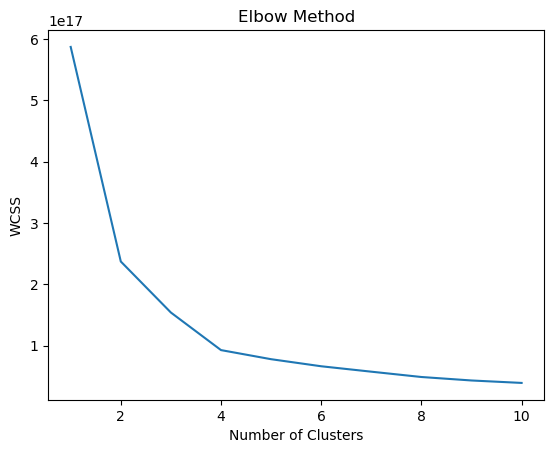

In [10]:
# find optimal k
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df[num_cols])
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [11]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(df)
labels = kmeans.labels_
df['cluster_k_means'] = labels

# Compute Silhouette score (higher better)
silhouette_avg = silhouette_score(df, labels)
print(f"The silhouette score for the clustering is: {silhouette_avg:.2f}")

# Compute Calinski-Harabasz index (higher better)
ch_score = calinski_harabasz_score(df, labels)
print(f"Calinski-Harabasz index: {ch_score}")

# Compute Davies-Bouldin index (lower better)
db_score = davies_bouldin_score(df, labels)
print(f"Davies-Bouldin index: {db_score}")

The silhouette score for the clustering is: 0.57
Calinski-Harabasz index: 1607.455436641517
Davies-Bouldin index: 0.7293691496987538


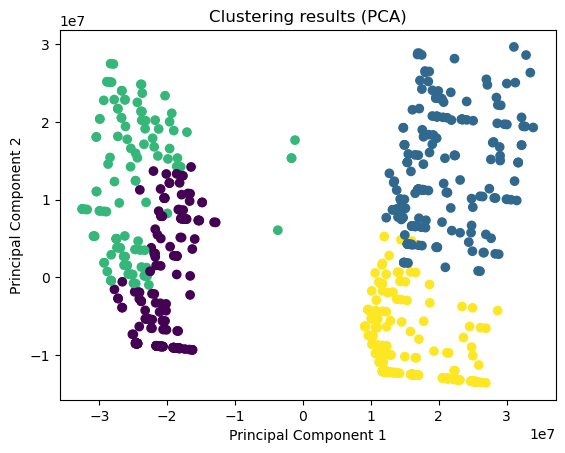

In [12]:
from sklearn.decomposition import PCA

# Reduce the dimensionality of the data using PCA
pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(df)

# Plot the data points with different colors for each cluster
plt.scatter(pca_transformed[:, 0], pca_transformed[:, 1], c=labels)
plt.title('Clustering results (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Mean-Shift Clustering

In [13]:
from sklearn.cluster import MeanShift, estimate_bandwidth
import numpy as np

X = df.values
bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=500)

# Perform Mean-Shift clustering
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X)

# Get the cluster labels and number of clusters
labels = ms.labels_
n_clusters = len(np.unique(labels))
df['cluster_mean_shift'] = labels

# Print the results
print("Number of clusters:", n_clusters)

# Compute Silhouette score (higher better)
silhouette_avg = silhouette_score(df, labels)
print(f"The silhouette score for the clustering is: {silhouette_avg:.2f}")

# Compute Calinski-Harabasz index (higher better)
ch_score = calinski_harabasz_score(df, labels)
print(f"Calinski-Harabasz index: {ch_score}")

# Compute Davies-Bouldin index (lower better)
db_score = davies_bouldin_score(df, labels)
print(f"Davies-Bouldin index: {db_score}")

Number of clusters: 5
The silhouette score for the clustering is: 0.57
Calinski-Harabasz index: 1295.3544638118185
Davies-Bouldin index: 0.6625013539382787


# Expectation–Maximization (EM) Clustering using Gaussian Mixture Models (GMM)

In [26]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

gmm = GaussianMixture(n_components=4, random_state=42, init_params='kmeans', covariance_type='tied')
gmm.fit(df)
labels = gmm.predict(df)

# add cluster labels to dataframe
df['cluster_GMM'] = labels

# print number of clusters
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print(f"Number of clusters: {n_clusters}")

# compute silhouette score (higher is better)
silhouette_avg = silhouette_score(df, labels)
print(f"The silhouette score for the clustering is: {silhouette_avg:.2f}")

# compute Calinski-Harabasz index (higher is better)
ch_score = calinski_harabasz_score(df, labels)
print(f"Calinski-Harabasz index: {ch_score}")

# compute Davies-Bouldin index (lower is better)
db_score = davies_bouldin_score(df, labels)
print(f"Davies-Bouldin index: {db_score}")

Number of clusters: 4
The silhouette score for the clustering is: 0.57
Calinski-Harabasz index: 1607.455436641523
Davies-Bouldin index: 0.7293691496987538
